In [57]:
from os import chdir
chdir("C:/Users/idris/Desktop/ENSAE/S1_3A/Statistique_Bayesienne/BayesianStats/")
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from src.model.mbc_model import MBClustering
import statsmodels.api as sm

In [58]:
sns.set_theme()

In [59]:
data_happiness = pd.read_csv(f"./data/world_data.csv", sep=",")

In [60]:
data_happiness

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.30,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.65,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.12,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.11,5480.0,3.8,1.86,22000.0,3280.0,23800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Tonga,NaN,5190.0,70.3,93.5,99.9,NaN,NaN,99.0,37.5,NaN,567.0,16.8,3.68,NaN,NaN,106000
190,Trinidad and Tobago,NaN,31300.0,73.1,92.1,96.9,NaN,NaN,98.8,40.3,12.10,14400.0,19.1,1.77,13000.0,3050.0,1360000
191,Tuvalu,NaN,3320.0,NaN,91.4,99.3,NaN,NaN,NaN,39.1,NaN,NaN,26.2,NaN,NaN,NaN,11000
192,Vanuatu,NaN,2810.0,63.6,53.5,90.5,NaN,0.978,83.2,37.6,NaN,159.0,28.2,3.31,NaN,2840.0,265000


# Data Preprocessing

In [61]:
#data_happiness.isna().sum()

In [62]:
data_happiness.dropna(axis=0, subset=["happiness"], inplace=True)
data_happiness = data_happiness.fillna(value=data_happiness.mean()).reset_index(drop=True)

C:\Users\idris\AppData\Local\Temp/ipykernel_16192/166416972.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_happiness = data_happiness.fillna(value=data_happiness.mean()).reset_index(drop=True)


In [63]:
scaler = MinMaxScaler()
scaler.fit(data_happiness.iloc[:, 2:])
data_happiness.iloc[:, 2:] = scaler.transform(data_happiness.iloc[:, 2:])

In [64]:
data_happiness.head()

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,0.009441,0.022642,0.345674,0.394435,0.074074,0.179549,0.183893,0.452039,0.060624,0.128095,0.526706,0.588430,0.000973,0.086957,0.023841
1,Albania,4.606651,0.086926,0.766038,0.975248,0.859247,0.216590,0.568425,0.959732,0.267241,0.028707,0.040309,0.087537,0.077686,0.045767,0.684783,0.001850
2,Argentina,6.697131,0.154779,0.724528,0.944038,0.993453,0.408032,0.078432,0.974497,0.534483,0.059019,0.105684,0.069733,0.176860,0.016903,0.706522,0.030772
3,Armenia,4.348320,0.063304,0.683019,0.909600,0.981997,0.341448,0.663914,0.997315,0.340517,0.013486,0.051744,0.087537,0.069421,0.000580,0.543478,0.001850
4,Australia,7.309061,0.361686,0.954717,1.000000,1.000000,0.585934,0.114381,0.755938,0.390086,0.013357,0.292314,0.011869,0.102479,0.003866,0.733696,0.016768


In [65]:
data_happiness.to_csv("./data/world_data_processed.csv", sep=";", index=False)

# Linear Regression

In [66]:
data_happiness.iloc[[101, 112, 137, 51, 46, 68, 120], :]

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
101,Qatar,6.374529,1.000000,0.875472,1.000000,1.000000,0.216590,0.004625,0.953020,0.452039,0.013099,1.000000,0.047478,0.114050,0.045767,0.526547,0.001536
112,Somalia,5.353645,0.000000,0.000000,0.098149,0.018003,0.092801,0.179549,0.755938,0.452039,0.060624,0.128095,1.000000,0.847934,0.006188,0.526547,0.009695
137,Yemen,2.982674,0.016896,0.373585,0.566294,0.515548,0.056076,0.049505,0.536913,0.433190,0.060624,0.014148,0.393917,0.472727,0.003866,0.157609,0.018983
51,Iceland,7.498071,0.352472,0.939623,0.987086,1.000000,0.216590,0.052594,0.755938,0.241379,0.008636,0.940667,0.000000,0.117355,0.000045,0.788043,0.000000
46,Guatemala,6.464987,0.055848,0.573585,0.649161,0.895254,0.134415,0.019266,0.679195,0.683190,0.060624,0.041496,0.202522,0.295868,0.011545,0.266304,0.011410
68,Liberia,2.701591,0.001357,0.245283,0.105682,0.507365,0.253017,0.039581,0.236242,0.357759,0.060624,0.128095,0.503709,0.563636,0.004402,0.146739,0.002979
120,Syria,3.461913,0.024100,0.418868,0.923590,0.945990,0.206201,0.179549,0.789262,0.413793,0.060624,0.027094,0.129822,0.285950,0.045767,0.526547,0.013125


c:\Users\idris\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


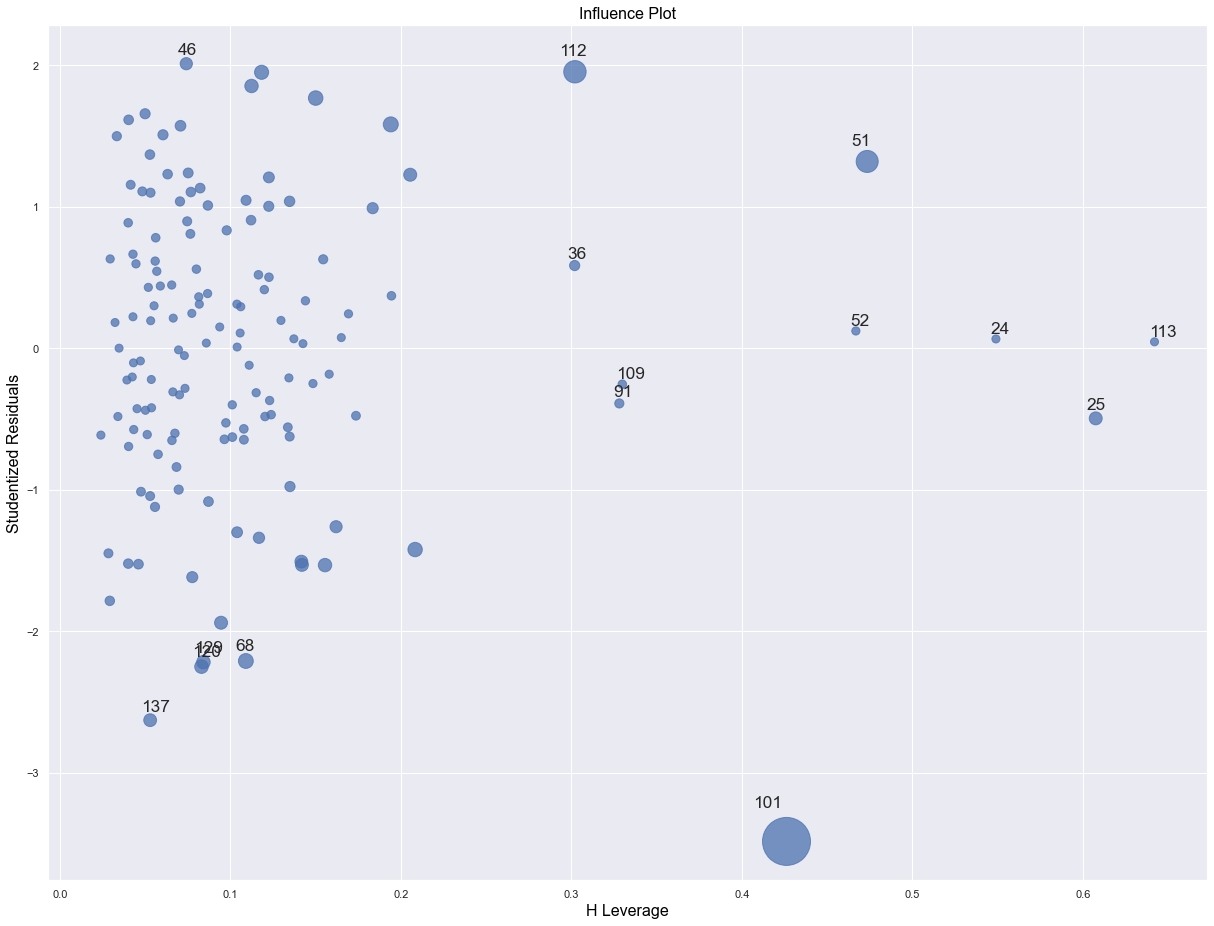

In [67]:
hapiness_model = sm.OLS(data_happiness.iloc[:, [1]], sm.add_constant(data_happiness.iloc[:, 2:])).fit()
fig, axe =  plt.subplots(1, 1, figsize=(17, 13))
fig = sm.graphics.influence_plot(hapiness_model, criterion="cooks", ax=axe)
fig.tight_layout(pad=1.0)

# Clustering Analysis

In [68]:
data_happiness = pd.read_csv("./data/world_data_processed.csv", sep=";")

In [69]:
list_clustering_data = []
for K in range(1, 10):
    init_Clusters = MBClustering(data_happiness, K).initZ()
    MBC_Clusters, BIC_val = MBClustering(data_happiness, K).EM_algo(5)
    list_clustering_data.append([K, init_Clusters, MBC_Clusters, BIC_val])
list_clustering_data = np.array(list_clustering_data)

c:\Users\idris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\idris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\idris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\idris\AppData\Local\Temp/ipykernel_16192/1344608710.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequen

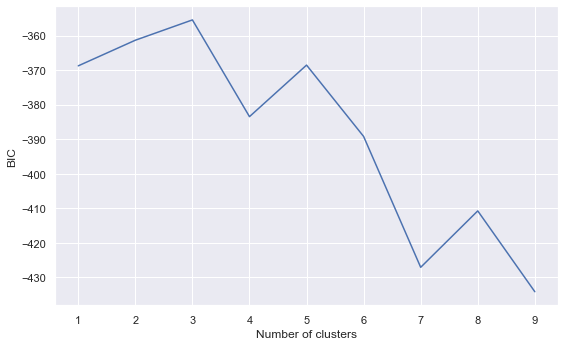

In [70]:
fig, axe =  plt.subplots(1, 1, figsize=(9, 5.5))
axe.plot(list_clustering_data[:, [0]], list_clustering_data[:, [3]])
axe.set_ylabel("BIC")
axe.set_xlabel("Number of clusters")
plt.savefig("./figs/bic.pgf", format='pgf')
plt.show()

In [71]:
stop

NameError: name 'stop' is not defined

In [72]:
K = 3

In [73]:
data_happiness.insert(1, "Kmeans_clusters", [1+list(list_clustering_data[K-1][1][n]).index(1) for n in range(list_clustering_data[K-1][1].shape[0])])

In [74]:
data_happiness.insert(1, "clusters", [1+list(list_clustering_data[K-1][2][n]).index(1) for n in range(list_clustering_data[K-1][2].shape[0])])

In [75]:
#data_happiness.to_csv(f"./data/world_data_clusters_{K}.csv", sep=";", index=False)

In [76]:
data_happiness[data_happiness.clusters==4].reset_index(drop=True)

,country,clusters,Kmeans_clusters,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population


In [77]:
data_happiness[data_happiness.clusters==3].reset_index(drop=True)

,country,clusters,Kmeans_clusters,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Benin,3,3,3.624664,0.011451,0.249057,0.073396,0.459902,0.216590,0.179549,0.045638,0.672414,0.060624,0.019219,0.725519,0.629752,0.011367,0.375000,0.007337
1,Botswana,3,3,3.761965,0.123784,0.275472,0.569522,0.659574,0.216590,0.179549,0.802685,0.946121,0.060624,0.064150,0.295994,0.252893,0.053512,0.217391,0.001343
2,Colombia,3,1,6.387572,0.103680,0.781132,0.832114,0.942717,0.397628,0.088730,0.916779,0.743534,1.000000,0.035131,0.100890,0.104132,0.026725,0.472826,0.034201
3,Georgia,3,3,4.121941,0.070424,0.618868,0.837495,0.890344,0.261340,0.179549,0.998658,0.426724,0.020967,0.060374,0.068249,0.125620,0.000813,0.532609,0.002586
4,Ghana,3,3,3.985916,0.027702,0.305660,0.077701,0.636661,0.144819,0.137786,0.620134,0.556034,0.060624,0.014796,0.436202,0.462810,0.041011,0.592391,0.019483
5,Iran,3,3,4.749956,0.128810,0.698113,0.874085,0.916530,0.227008,0.195828,0.801342,0.478448,0.060624,0.159623,0.100148,0.074380,0.017081,0.630435,0.056492
6,Kuwait,3,3,6.146032,0.575295,0.849057,1.000000,1.000000,0.637953,0.179549,0.920805,0.452039,0.011693,0.480024,0.048220,0.123967,0.045767,0.853261,0.002579
7,Lebanon,3,3,5.171971,0.104518,0.860377,0.950495,0.873977,0.356013,0.179549,0.863087,0.327586,0.060624,0.069005,0.045994,0.079339,0.000455,0.619565,0.003944
8,Liberia,3,3,2.701591,0.001357,0.245283,0.105682,0.507365,0.253017,0.039581,0.236242,0.357759,0.060624,0.128095,0.503709,0.563636,0.004402,0.146739,0.002979
9,Luxembourg,3,3,6.701571,0.793092,0.932075,0.974171,1.000000,0.216590,0.149020,0.755938,0.370690,0.008210,0.350029,0.002226,0.052893,0.000045,0.875000,0.000169


In [78]:
data_happiness[data_happiness.clusters==2].reset_index(drop=True)

,country,clusters,Kmeans_clusters,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,2,2,3.982855,0.009441,0.022642,0.345674,0.394435,0.074074,0.179549,0.183893,0.452039,0.060624,0.128095,0.526706,0.588430,0.000973,0.086957,0.023841
1,Argentina,2,2,6.697131,0.154779,0.724528,0.944038,0.993453,0.408032,0.078432,0.974497,0.534483,0.059019,0.105684,0.069733,0.176860,0.016903,0.706522,0.030772
2,Australia,2,2,7.309061,0.361686,0.954717,1.000000,1.000000,0.585934,0.114381,0.755938,0.390086,0.013357,0.292314,0.011869,0.102479,0.003866,0.733696,0.016768
3,Bolivia,2,2,5.834329,0.049482,0.592453,0.489884,0.883797,0.388265,0.042577,0.884564,0.648707,0.060624,0.039284,0.267062,0.277686,0.002973,0.179348,0.007409
4,Brazil,2,2,6.546897,0.117921,0.675472,0.850409,0.959083,0.385144,0.179549,0.873826,0.747845,0.201553,0.076556,0.100148,0.082645,0.087443,0.722826,0.146942
5,Cameroon,2,2,5.037965,0.019828,0.090566,0.341369,0.432079,0.236371,0.112509,0.617450,0.646552,0.060624,0.015173,0.601632,0.585124,0.098158,0.402174,0.016054
6,Canada,2,2,7.412773,0.354985,0.920755,0.983857,0.981997,0.434041,0.063735,0.755938,0.375000,0.022386,0.406666,0.021513,0.057851,0.012617,0.847826,0.025413
7,Chad,2,2,4.322675,0.011954,0.071698,0.026582,0.058920,0.047753,0.179549,0.135570,0.575431,0.060624,0.128095,0.955490,0.795041,0.037440,0.097826,0.009767
8,"Congo, Rep.",2,2,4.690830,0.041189,0.200000,0.085235,0.481178,0.576571,0.179549,0.755938,0.696121,0.060624,0.025853,0.394659,0.575207,0.014760,0.152174,0.003337
9,Costa Rica,2,2,6.854004,0.119596,0.890566,0.968790,0.995090,0.240533,0.109701,0.953020,0.685345,0.066759,0.052284,0.051187,0.092562,0.001509,0.500000,0.003201


In [79]:
data_happiness[data_happiness.clusters==1].reset_index(drop=True)

,country,clusters,Kmeans_clusters,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Albania,1,3,4.606651,0.086926,0.766038,0.975248,0.859247,0.216590,0.568425,0.959732,0.267241,0.028707,0.040309,0.087537,0.077686,0.045767,0.684783,0.001850
1,Armenia,1,1,4.348320,0.063304,0.683019,0.909600,0.981997,0.341448,0.663914,0.997315,0.340517,0.013486,0.051744,0.087537,0.069421,0.000580,0.543478,0.001850
2,Austria,1,1,7.076447,0.364199,0.909434,1.000000,1.000000,0.180191,0.132169,0.755938,0.299569,0.005592,0.201696,0.010386,0.041322,0.003152,1.000000,0.005966
3,Azerbaijan,1,1,5.146775,0.134674,0.547170,0.884847,0.744681,0.197878,0.205190,1.000000,0.000000,0.002019,0.077635,0.221068,0.140496,0.001134,0.646739,0.006637
4,Bahrain,1,1,6.007375,0.367550,0.735849,1.000000,1.000000,0.216590,0.179549,0.930201,0.452039,0.005759,0.568484,0.040801,0.133884,0.045767,0.526547,0.000743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,United Kingdom,1,1,6.515445,0.317289,0.886792,0.990314,1.000000,0.235331,0.114381,0.755938,0.357759,0.001516,0.145599,0.016320,0.105785,0.016724,0.809783,0.046490
79,United States,1,1,6.863947,0.437077,0.811321,1.000000,0.986907,0.433000,0.075905,0.755938,0.525862,0.081850,0.363514,0.032641,0.114050,0.232095,0.951087,0.228390
80,Venezuela,1,1,5.568800,0.125460,0.686792,0.945114,0.957447,0.261340,0.072722,0.942282,0.653017,0.204133,0.119168,0.106825,0.181818,0.017617,0.380435,0.022055
81,Vietnam,1,1,5.076315,0.042278,0.641509,0.765390,0.855974,0.117769,0.026288,0.914094,0.392241,0.060624,0.032056,0.146884,0.119008,0.044583,0.445652,0.066637
